## 1. Setup and Load Data
#### Install Dependencies and Setup

In [1]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip list

Package                 Version
----------------------- -----------
absl-py                 2.2.2
asttokens               3.0.0
astunparse              1.6.3
certifi                 2025.1.31
charset-normalizer      3.4.1
comm                    0.2.2
contourpy               1.3.2
cycler                  0.12.1
debugpy                 1.8.14
decorator               5.2.1
executing               2.2.0
flatbuffers             25.2.10
fonttools               4.57.0
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.71.0
h5py                    3.13.0
idna                    3.10
ipykernel               6.29.5
ipython                 9.1.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.7.2
keras                   3.9.2
kiwisolver              1.4.8
libclang                18.1.1
Markdown                3.7
markdown-it-py          3.0.0
MarkupSafe              3.0.2
matplotlib           

In [2]:
# Import the required dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import pyplot as plt;

#### Clean the files and folders

In [3]:
#check and print the current Working Directory
wrk_dir = os.getcwd()
print(f"Current working directory is: {wrk_dir}")

Current working directory is: /home/dolaposalim/tensorflow-env/fila/filadentification/scr


In [4]:
cap_dir = r"/home/dolaposalim/tensorflow-env/fila/filadentification/data/cap"

In [5]:
# to delete unwanted files in the directory

for image in os.listdir(cap_dir):
    if image.lower().endswith(".jpg"):
        print(f"image: {image} is in the right format")
    elif image.lower().endswith(".jpeg"):
        print(f"image: {image} is in the right format")
    elif image.lower().endswith(".png"):
        print(f"image: {image} is in the right format")
    else:
        os.remove(os.path.join(cap_dir, image))
        print(f"deleted non jpg image: {image}")
        
print(f"cleaning completed with {len(os.listdir(cap_dir))} images left in directory")

image: img_82.jpeg is in the right format
image: img_37.jpg is in the right format
image: img_19.jpg is in the right format
image: img_72.jpeg is in the right format
image: img_229.jpeg is in the right format
image: img_233.jpeg is in the right format
image: img_101.jpeg is in the right format
image: img_227.jpeg is in the right format
image: img_128.jpeg is in the right format
image: img_113.jpeg is in the right format
image: img_89.jpeg is in the right format
image: img_221.jpeg is in the right format
image: img_271.jpeg is in the right format
image: img_178.jpeg is in the right format
image: img_136.jpeg is in the right format
image: img_31.jpg is in the right format
image: img_240.jpeg is in the right format
image: img_241.jpeg is in the right format
image: img_107.jpeg is in the right format
image: img_142.jpeg is in the right format
image: img_76.jpeg is in the right format
image: img_239.jpeg is in the right format
image: img_248.jpeg is in the right format
image: img_200.jpeg i

In [6]:
img_folder = cap_dir
print(f"img_folder: {img_folder}")

img_folder: /home/dolaposalim/tensorflow-env/fila/filadentification/data/cap


In [7]:
#remove images with size less than 10KB
for image in os.listdir(img_folder):
    path = f"{img_folder}/{image}"
    if os.path.isfile(path) and os.path.getsize(path) <= 5 * 1024:
        os.remove(path)

print("All images with size less than 10KB have been deleted.")
   

All images with size less than 10KB have been deleted.


In [8]:
# Get a sorted list
image_files = [f for f in os.listdir(img_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_files.sort()


for index, filename in enumerate(image_files):
    ext = os.path.splitext(filename)[1]
    new_name = f"img_{index}{ext}"
    
    # Full old and new paths
    old_path = os.path.join(img_folder, filename)
    new_path = os.path.join(img_folder, new_name)
    
    # Rename
    os.rename(old_path, new_path)

print(" Renaming complete!")

 Renaming complete!


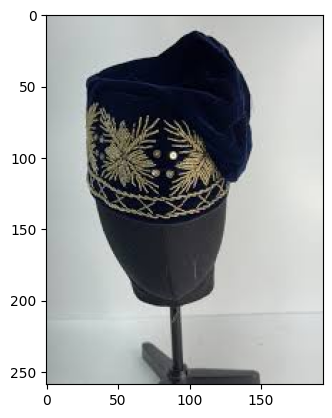

In [10]:
all_images = [f for f in os.listdir(img_folder)
              if os.path.isfile(os.path.join(img_folder, f))]
#BGR - RGB
random_image = random.choice(all_images)
img = cv2.imread(os.path.join(img_folder, random_image))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);

In [11]:
img_rgb.shape

(259, 194, 3)

### Create Dummy Binary Class Dataset


In [ ]:
!pip install tensorflow-datasets


- CIFAR-10: A dataset with 10 classes, including objects like airplanes, cars, and animals.
- ImageNet: A large dataset of diverse categories (though this is larger and might require more computational resources).
- Oxford Pets: A dataset containing images of pets, which could be relevant as images of animals without caps.
- For the "no cap" class, a dataset like CIFAR-10 or Oxford Pets would be suitable because they contain real-world images that do not feature caps.

In [18]:
import tensorflow_datasets as tfds

In [19]:
no_cap_dir = "/home/dolaposalim/tensorflow-env/fila/filadentification/data/no-cap"
os.makedirs(no_cap_dir, exist_ok=True)

In [47]:
# Save the first 250 images
for index, (image, label) in enumerate(dataset.take(250)):
    img_array = image.numpy()
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    img_bgr = cv2.resize(img_bgr, (32, 32))  # 
    save_path = os.path.join(no_cap_dir, f"img_no_cap{index}.jpg")
    cv2.imwrite(save_path, img_bgr)

print(f"{len(os.listdir(no_cap_dir))} images saved");

250 images saved


2025-04-21 18:51:00.367397: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


#### Load our data

``` tf.keras.utils.image_dataset_from_directory```
###### Load images from folders	image_dataset_from_directory(): Auto-labels, resizes, batches, and shuffles your image data from disk
- Automatically reads images from a directory with subfolders as class labels
- Converts them into a TensorFlow dataset
- Automatically resizes, batches, and labels them
- Works well with model.fit(), ready to train a model


In [ ]:
tf.keras.utils.image_dataset_from_directory